# **CLASSIFICATION AND REGRESSION PROBLEMS:**

**2 types of problems in prediction:** 

1. **Classification problems** - here the outcome variable (the variable we want to predict) can only assume certain values (finite number of values).

  Examples (classification):
* classifying email as spam or not;
* classifying a credit card transaction as fraudlent or not;
* predict wether a customer will buy a new product after a marketing campaign or not;


2. **Repression problems** - where the variable to predict is numerical.

  Examples (regression):
* to predict the next year total sales;
* to predict the price within one month of a stock (stock market).

The price and the total sales can be any number, so they are numerical variables.


# **1. REGRESSION PROBLEM**

A prediction model based on the linear regression model will be developed, to predict the quality of wines based on their chemical composition.
The prediction of the quality of a new product using the respective chemical composition may help companies to develop new successful products.

A detailed discussion about `sklearn pipelines` will be presented.

`Scikit-learn (sklearn) pipelines` are a powerful tool for building and tuning complex machine learning workflows. A pipeline is a series of processing steps that can include data pre-processing, feature extraction, feature selection, model fitting, and prediction. The key advantage of using a pipeline is that it encapsulates the entire workflow into a single object, which makes it easier to manage and debug.

Pipelines of `sklearn` can greatly help us, as, by using them, we will be able to automate a substantial part of the needed work, making our life a lot easier.

**Once we've created the pipeline, we can use it to fit and predict on our data.**

**NOTE:** The Python code structure to create prediction models is similar across a great variety
of prediction models – the procedure will be, in essence, repeated when other models,
beyond the linear regression model, are used.

#**2. Reading the dataset to Python:**

We need to use pandas and load pandas before reading the dataset.


Dataset: Red wine


In [3]:
import pandas as pd

Now we can read the dataset to a pandas dataframe:

In [4]:
df = pd.read_csv('/content/winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# **3. Preprocessing of data:**

This step aims to prepare the data to be used by the model. In general, it involves multiple steps. To automate the preprocessing stage, we will use `sklearn` pipelines.

The `sklearn` functions need the original dataset separated into two dataframes:
* X, which must contain all the predictors;
* y, which must contain only the outcome variable.

In [42]:
X = df.drop('quality', axis=1) #axis=1 means that we are droping a column and not a row
y = df['quality']

In [6]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [7]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

#**3.1 Split of data into train and test sets**

Dividir o conjunto de dados em dados de treinamento (train data) e dados de teste (test data) é uma prática comum na modelagem de dados e no desenvolvimento de modelos de aprendizado de máquina e tem como objetivo avaliar a capacidade de um modelo de generalizar para novos dados.

O `train data` é utilizado para ajustar os parâmetros do modelo, ou seja, para treinar o modelo, enquanto o `test data` é utilizado para avaliar o desempenho do modelo em dados não vistos durante o treinamento.

Existem várias razões pelas quais essa divisão é importante, incluindo:

* **Avaliação do desempenho do modelo:** A divisão do conjunto de dados em conjuntos de treinamento e teste permite que o modelo seja avaliado em dados não vistos antes, ou seja, dados que não foram usados para treinar o modelo. Isso é importante porque um modelo que se ajusta perfeitamente aos dados de treinamento pode não ter um bom desempenho em dados não vistos, indicando que ele não é generalizável e não pode ser usado para prever novos dados.

* **Evitar overfitting:** Ao treinar um modelo em todo o conjunto de dados disponíveis, o modelo pode se ajustar muito bem aos dados de treinamento e se tornar superajustado (overfitting) aos dados de treinamento. Isso significa que o modelo se torna muito específico para os dados de treinamento e não pode ser usado para prever dados novos ou diferentes. 

Sem esta divisão, o modelo pode ser ajustado para se adequar demasiado bem aos dados utilizados no treinamento, mas não terá capacidade de generalizar para dados não vistos anteriormente. A falta de capacidade de generalização é conhecida como overfitting.

Ao dividir o dataset em train e test data, é possível ajustar o modelo ao train data e avaliar o seu desempenho em dados não vistos utilizando o test data. Este processo permite ajustar os parâmetros do modelo de forma a minimizar o erro no test data.


Prediction is useless if aimed to predict the past! Prediction is needed to predict cases still unseen. However, we only have data from the past, and we don't know wether our prediction model will work well in unseen cases. Thus, to overcome this difficulty, we will randomly split the data into train and test sets:
* train set - we will create the model (usual 80%)
* test set - to get an idea about how the model will work with unseen cases (usual 20%)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
#test_size is to use 20% of the initial dataset as test set

**NOTE:** We do not really need to use random_state=45. However, to make our results reproducible, we do use it, given the random nature of the splitting process. In fact, the elements that go into train and test sets are randomly chosen, but the random choice of elements will be always the same, if we fix the random_state with an integer. We used the number 45, but we could have used any integer number.

Podemos usar qualquer número para `random_state` desde que usemos sempre o mesmo número em diferentes execuções do código se quiser obter a mesma divisão aleatória entre o conjunto de treinamento e o conjunto de teste. A escolha de um número específico é arbitrária e não tem efeito sobre o desempenho do modelo ou a qualidade da divisão de treinamento-teste. O importante é usar o mesmo número sempre que você precisar dividir seu conjunto de dados em treinamento e teste, para garantir a reprodutibilidade dos resultados.

#**3.2 Data Scaling**

In [10]:
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


RESUME: As we can see, the predictors have quite different scales. This may negatively impact the predict performance of the model. To solve this problem, we can scale all the predictors to have them in a similar scale using `StandardScaler`.

The predictor `total sulfur dioxide` assumes large values, while predictor `chlorides` assumes very tiny values. This asymmetry of scales may impact negatively on the predictive performance of our model. Consequently, we need to reduce all predictors to a similar scale. Basically, for each predictor, we need to subtract all values by its mean and,subsequently, divide the resulting values by the standard deviation of the predictor.
This procedures will scale the `predictors` we select, which will have mean equal to 0 and standard deviation equal to 1. If we apply this calculations to all columns, all columns will be equally scaled: mean 0 and standard deviation 1.

`sklearn` has a function that can scale a predictor (in the described way) - `StandardScaler`. Although simplifying, function `StandardScaler` would need to be applied to all predictors - and that is not practical, as, usually, we have a lot of predictors!

SOLUTION - use `sklearn` pipelines (group of sequential steps that can be executed to gether by calling the pipeline name).

In [11]:
from sklearn.preprocessing import StandardScaler

To use the `pipeline` function.

In [12]:
from sklearn.pipeline import Pipeline

To create a pipeline with the scaler:

In [13]:
scaler = Pipeline([
    ('scale', StandardScaler())
])

Esse código cria um objeto de pipeline que contém apenas um estimador de pré-processamento, que é o `StandardScaler`, usado para padronizar as características (features) dos dados para ter média zero e variância unitária, o que ajuda a garantir que cada característica tenha um peso igual na análise.

A Pipeline é uma classe do scikit-learn que permite encadear vários passos em um único objeto, para que você possa executar várias transformações de pré-processamento e modelagem em seus dados, de uma maneira mais organizada e eficiente.

Nesse caso específico, a Pipeline contém apenas um passo ('scale', StandardScaler()) que aplica o StandardScaler para padronizar os recursos do conjunto de dados. Depois que o pipeline é criado, ele pode ser usado como qualquer outro estimador do scikit-learn para pré-processar os dados antes de aplicar um modelo de aprendizado de máquina.

**NOTE:** until now the scaler is just defined and is not applied to any column. Before the scaler is applied to any column, we need to tell Python which columns we want to scale. To accomplish that, we need to use `ColumnTransformer`.

In [14]:
from sklearn.compose import ColumnTransformer

Now, we can tell Python that we want all predictors to be scaled.


In [15]:
preprocessor = ColumnTransformer([
    ('scale2', scaler, 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')
],
remainder = 'passthrough'
)

Or...


**NOTE:** to get the names of all the predictors we can use:

In [16]:
X.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [17]:
preprocessor = ColumnTransformer([
    ('scale2', scaler, X.columns.to_list())
],
remainder = 'passthrough'
)

O código cria um objeto `ColumnTransformer`, que é uma ferramenta do Scikit-learn que ajuda a aplicar diferentes transformações em diferentes colunas de um conjunto de dados.

O objeto `scaler` é um pré-processador que padroniza os valores das colunas para que elas tenham uma média de zero e desvio padrão de um.

O `ColumnTransformer` usa o `scaler` para pré-processar todas as colunas do conjunto de dados. Ele faz isso criando uma lista de tuplas onde cada tupla especifica a transformação a ser aplicada a uma coluna do conjunto de dados.
Cada tupla contém três elementos:

* O primeiro elemento é uma string que é usada apenas para identificar a transformação, pode ser qualquer nome.
* O segundo elemento é o objeto de pré-processamento que será aplicado a essa coluna, neste caso, `scaler`.
* O terceiro elemento é uma lista com o nome das colunas que devem ser pré-processadas, neste caso, o objeto de processamento, `scaler` será aplicado a todas as colunas do conjunto de dados, mas poderiam não ser.

`remainder='passthrough'` - usado para manter as colunas não pré-processadas no conjunto de dados, ou seja, não há transformação nelas.

Em resumo, o ColumnTransformer com o scaler é uma forma eficiente de pré-processar diferentes colunas do conjunto de dados de maneiras diferentes, o que pode ajudar a melhorar o desempenho do modelo de aprendizado de máquina que será aplicado posteriormente.

Now, everything is ready to apply the linear regression model. We will use a pipeline with two steps:
* preprocessing step;
* linear regression.

In other words, we need to create a final pipeline to run in sequence, the `preprocessor` column transformer (that, in turn, uses the `scaler` pipeline) and the linear regression model.

To load the function that creates the linear regression model:

In [18]:
from sklearn.linear_model import LinearRegression

And the final pipeline can be created as follows:

In [19]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('lm', LinearRegression())])

O código cria um objeto `Pipeline` que encapsula o pré-processamento do conjunto de dados e o modelo de regressão linear.

O `preprocessor` é o objeto criado anteriormente com o `ColumnTransformer` e é responsável por aplicar diferentes transformações em diferentes colunas do conjunto de dados.

O `LinearRegression()` é um modelo de regressão linear do `Scikit-learn` que será treinado com o conjunto de dados pré-processado.

O `Pipeline` permite encadear vários estágios de pré-processamento e modelagem em um único objeto. No código, o estágio "pre" corresponde ao pré-processamento do conjunto de dados usando o preprocessor e o estágio "lm" corresponde ao modelo de regressão linear.

Em resumo, o `Pipeline` é uma ferramenta que permite encadear diferentes etapas de pré-processamento e modelagem em um único objeto, facilitando o processo de treinamento e aplicação de modelos de aprendizado de máquina.

# **BUT...**

The pipeline is created, but not executed! This means that no scaling has been
done. Moreover, the linear regression model has not yet been applied. Why? Because all pipelines and transformers have just been defined, but not executed: The execution of the pipelines is triggered by function `fit` as follows:

In [20]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale2',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('lm', LinearRegression())])

Now, to make predictions for the outcome variable:

In [48]:
y_pred = pipe.predict(X_train)
y_pred

array([6.48553273, 4.72694379, 5.84088531, ..., 5.48660099, 6.34047368,
       5.4922784 ])

# **4. PREDICTIVE PERFORMANCE OF THE MODEL**

W used the train set to make predictions. Now, we need to evaluate the quality of the predictions. To exemplify, we can use the first rows of the train set and the respective predicitons:

In [22]:
pd.DataFrame({
    'y_true':y_train,
    'y_pred':y_pred
})

,y_true,y_pred
1108,7,6.485533
709,5,4.726944
823,6,5.840885
4109,6,6.496332
1243,7,6.425209
...,...,...
4473,5,5.191853
580,5,5.176507
163,6,5.486601
4703,7,6.340474


As we can see, the absolute error is kind of acceptable (the difference between the y_true and the y_pred)! To have as overall perspective, we can take the mean of the absolute error corresponding to predictions for all elements of the train set. To do that, we could use the usual Python functions to calculate the mean absolute error. Fortunately, `sklear` offers us a function that already computes the mean absolute error: `mean_absolute_error`.

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
mean_absolute_error(y_train, y_pred)

0.5859156936493961

To print the mean absolute error with a nicer format:

In [25]:
mae = mean_absolute_error(y_train, y_pred)
print(f'MAE={mae}')

MAE=0.5859156936493961


**NOTE:** With f-strings (strings like f''), the variables inside curly brackets will be replaced with their current values. Thus, when printing, the variable mae will be replaced with its current value.

To set the decimals to 4 digitits, we can add: 0.04f

In [26]:
print(f'MAE={mae:0.04f}')

MAE=0.5859


**ANALYSIS**

MAE is a metric that measures the average absolute difference between the predicted and true values. This function is commonly used in regression tasks to evaluate the performance of a ML model. A lower MAE indicates better performance of the model in predicting the true values.

Since MAE is 0,5859, on average, the error is much below one quality unit. Not bad!

But, how can the company use this model to produce a new wine? Well, the estimates of the parameters can be obtained, i.e., the coefficients:

In [27]:
pipe.named_steps['lm'].coef_

array([ 0.05327132, -0.18799844, -0.00285321,  0.39110592, -0.00739712,
        0.07184577, -0.00867385, -0.41388714,  0.10288324,  0.06487277,
        0.25983798])

The `named_steps` attribute of the pipeline object is a dictionary that maps the names of the pipeline steps to the corresponding transformer or estimator objects. In this case, 'lm' is the name of the linear regression estimator step in the pipeline.

The `coef_` attribute of a linear regression model in scikit-learn returns an array of the coefficients of the linear regression equation. Each element of the array corresponds to the coefficient of a feature in the input data.

Therefore, `pipe.named_steps['lm'].coef_` returns the **coefficients of the linear regression model in the pipeline**. These coefficients can be used to interpret the impact of each feature on the target variable, and to make predictions using the model.

We can form a dataframe with the coefficients and their corresponding names:

In [28]:
results = pd.DataFrame({
    'Coefficients': X.columns,
    'Predictions': pipe.named_steps['lm'].coef_
})
results

,Coefficients,Predictions
0,fixed acidity,0.053271
1,volatile acidity,-0.187998
2,citric acid,-0.002853
3,residual sugar,0.391106
4,chlorides,-0.007397
5,free sulfur dioxide,0.071846
6,total sulfur dioxide,-0.008674
7,density,-0.413887
8,pH,0.102883
9,sulphates,0.064873


As we can see, the most positive contributors to wine quality are: `residual sugar`, `alcohol` and `pH`.

The most negative contributors are: `density` and `volatile acidity`.

Thus, if a wine producer correctly manipulates those factors, while manufacturing a new wine, the new wine will probably be a high quality wine. This same methodology can be applied to develop not only new wines but also many other products.

Another way to assess the predictive performance of a regression model is to use the **root mean squared error (RMSE)**, which is the square root of the mean squared error.

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
rmse = mean_squared_error(y_train, y_pred, squared=False)
rmse

0.7521265125434424

The `squared` parameter is set to False to return the ROOT MSE instead of the MSE.

In [31]:
print(f'RMSE={rmse:0.04f}')

RMSE=0.7521


Both MAE and RMSE are small compared the mean of the outcome variable:

In [32]:
y_train.mean()

5.8797856049004595

#**COEFFICIENT OF CORRELATION**

To calculate the R2, we need to load `r2_score` function.

R2 => good predictions, if the value of R2 is close to 1

R2 => bad predictions, if the value of R2 is close to 0

R2 = 0.9 => very good predictions

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2 = r2_score(y_train, y_pred)
r2

0.27577917074526737

In [35]:
print(f'R2= {r2}')

R2= 0.27577917074526737


# **ANALYSIS**

The predictive performance of this model is not good, since R2 is very low. This means that we should try another model or this is suggesting that some important predictors are missing.

**NOTE ABOUT PREDICTION MODELS:** 

* There is not a perfect model. Não há um que seja substancialmente melhor do que outro.

  1. Some work fine with a specific dataset, but not with another dataset
  2. That's why we need to learn several models.

* If a model does poorly, that may mean that important predictors are missing.
* In addiction, some problems cannot be predicted at all => example: euromillions.

To get an idea about our model works with unseen data, we will use the `test set`, which has not been used for anything up to now.

In [47]:
y_pred = pipe.predict(X_test)

In [37]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r22 = r2_score(y_test, y_pred)

In [38]:
print(f'MAE={mae}')
print(f'MSE={mse}')
print(f'RMSE={rmse}')
print(f'R22={r22}')

MAE=0.5730106620077944
MSE=0.5543180198119331
RMSE=0.7445253654590508
R22=0.30403261702378337


Actually, with unseen cases, the errors don't change a lot, so this model will not work well with this dataset, but in the next dataset will work very good.

Se um modelo tem um R² baixo tanto para o `train data` quanto para o `test data`, isso significa que o modelo não está sendo capaz de explicar bem a variância dos dados, ou seja, não está conseguindo ajustar bem os dados de treinamento e também não está generalizando bem para os dados de teste.

* `train data` => o modelo não está conseguindo capturar a relação entre as variáveis independentes e a variável dependente de forma adequada, ou que há valores atípicos (outliers) nos dados de treinamento que estão afetando o ajuste do modelo.

* `test data` => o modelo está sofrendo de overfitting, ou seja, está sendo ajustado demasiadamente bem aos dados de treinamento, mas não está generalizando bem para dados novos e desconhecidos. Isso pode ocorrer quando o modelo é muito complexo em relação ao tamanho do conjunto de dados ou quando não há uma quantidade suficiente de dados de treinamento para treinar adequadamente o modelo.

Em resumo, um R² baixo para o train data e test data sugere que **o modelo não está ajustando e generalizando bem para os dados e que talvez seja necessário explorar outras abordagens de modelagem ou coletar mais dados para melhorar o ajuste do modelo**.

#**PLOTS**

We can plot the residuals (that is, the prediction errors), to have a broader understanding 

In [45]:
from matplotlib import pyplot as plt #needed for adding the labels
import seaborn as sns

In [49]:
residuals = y_train - y_pred
residuals

1108    0.514467
709     0.273056
823     0.159115
4109   -0.496332
1243    0.574791
          ...   
4473   -0.191853
580    -0.176507
163     0.513399
4703    0.659526
3616   -0.492278
Name: quality, Length: 3918, dtype: float64

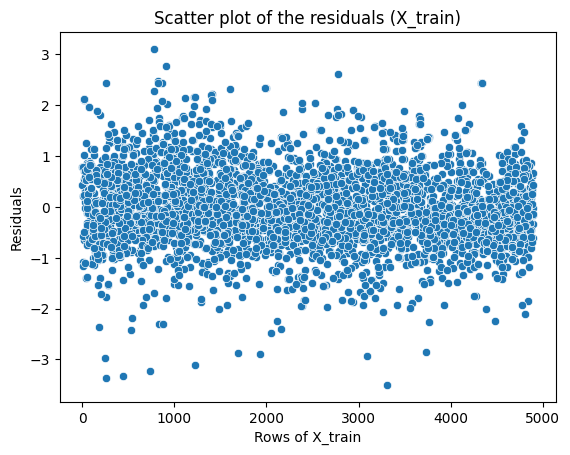

In [50]:
sns.scatterplot(residuals)
plt.xlabel('Rows of X_train')
plt.ylabel('Residuals')
plt.title('Scatter plot of the residuals (X_train)')
plt.show()

As we can see, almost all errors of prediction are between -3 and 3, but most of them are between -2 and 2. Taking into account our goal, many prediction fail largely their targets! Considerando o objetivo do modelo (predict the quality of wines based on their chemical composition), muitas previsões não estão acertando seus alvos corretamente. Isso pode ser interpretado como uma falha no modelo em prever os valores corretos da variável dependente com base nas variáveis independentes utilizadas.

The initial bright picture is becoming somber! Ou seja, a princípio o modelo pode ter apresentado resultados promissores ou animadores, mas após uma análise mais detalhada dos erros de previsão e das metrícas de desempenho, percebeu-se que ele não está performando tão bem quanto o esperado.

This justifies the fact that R2 is low, which expresses poor predictive performance. Recall that, regarding R2: values close to 0 mean low predictive performance, while values close to 1 mean high predictive performance. Significa que o fato do coeficiente de determinação R² ser baixo (ou seja, o modelo não está explicando bem a variância dos dados) é justificado pela grande quantidade de previsões que estão falhando em atingir seus objetivos. Em outras palavras, a baixa qualidade das previsões é uma das razões para o baixo valor de R² e para o mau desempenho preditivo do modelo.

In [51]:
import numpy as np

Let us try to find examples where the prediction error is extreme (outliers):

In [53]:
extreme_e = pd.DataFrame({
    'y_train': y_train[np.abs(residuals>2.5)].values,
    'y_pred': np.round(y_pred[np.abs(residuals>2.5)], 2)})
extreme_e

,y_train,y_pred
0,9,5.89
1,6,3.38
2,8,5.22


To plot the histogram of the residuals will help to further understand the structure of the prediciton errors:


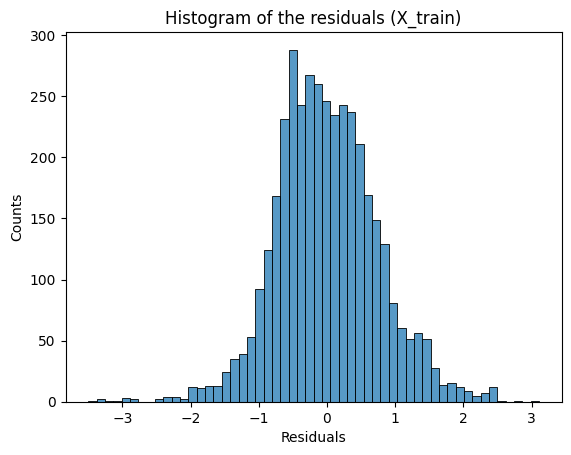

In [54]:
sns.histplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Counts')
plt.title('Histogram of the residuals (X_train)')
plt.show()

#**Analysis of the histogram**

A partir do histograma dos resíduos, é possível observar que a maioria deles está concentrada em valores entre -1 e 1. Além disso, há uma tendência de subestimar a variável de resultado quando o erro de previsão está acima de 1, já que o histograma é mais acentuado quando o erro está acima de 1 em comparação com quando o erro está abaixo de -1.

Essa informação é útil para entender melhor como o modelo está se comportando em relação às previsões. O fato de haver uma concentração de resíduos em torno de valores baixos sugere que o modelo está fazendo previsões relativamente precisas em relação à variável de resultado. Por outro lado, a tendência de subestimar a variável de resultado quando o erro de previsão está acima de 1 indica que o modelo pode estar falhando em prever corretamente os valores mais altos da variável de resultado.


The fact that our model is not so great (considering the company’s goal) may be due to:
* Important predictors are missing in the dataset.
* The used model is not the most appropriate.
* Some tuning of model is still needed.
The reason because there are so many types of models is that some models perform better than others in each dataset. In sum, there is no universally better model!

# **LASSO REGRESSION**

Sets to zero the weaker predictors automatically.


In [55]:
from sklearn.linear_model import Lasso

We just need to replace the linear regression of the pipe by the lasso regression.

In [57]:
pipe2 = Pipeline([
    ('pre', preprocessor),
    ('lasso', Lasso(alpha=0.1))
])


In [58]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale2',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('lasso', Lasso(alpha=0.1))])

To obtain the coefficients values.

In [59]:
feature_names = preprocessor.get_feature_names_out()
coefficients = pipe2.named_steps['lasso'].coef_
df2 = pd.DataFrame({'Feature Name': feature_names, 'Coefficient': coefficients})
print(df2)


                    Feature Name  Coefficient
0          scale2__fixed acidity    -0.000000
1       scale2__volatile acidity    -0.087083
2            scale2__citric acid    -0.000000
3         scale2__residual sugar     0.000000
4              scale2__chlorides    -0.000000
5    scale2__free sulfur dioxide     0.000000
6   scale2__total sulfur dioxide    -0.000000
7                scale2__density    -0.000000
8                     scale2__pH     0.000000
9              scale2__sulphates     0.000000
10               scale2__alcohol     0.287950


As discusses previously, some predictors were forced to zero, the weaker ones. And now we only have two predictors for the model.

**PREDICTIVE PERFORMANCE**

In [61]:
y2_pred = pipe2.predict(X_train)
print(f'R2= {r2_score(y_train, y2_pred):0.03f}')
print(f'MAE= {mean_absolute_error(y_train, y2_pred):0.03f}')
print(f'RMSE= {mean_squared_error(y_train, y2_pred, squared=False):0.03f}')


R2= 0.206
MAE= 0.615
RMSE= 0.787


The erros increased and the R2 decreased, which means that the lasso regression drop important variables to the prediction of the outcome variable.

**OPTIMIZATION OF HYPERPARAMETERS**

We have been using alpha=0.1 but who tells us that that is the best hyperpamater that we can use, i.e., the value that leads to the best predictive performance of the model?

Let's do a Grid Search CV

In [63]:
hyperparameters = {
    'alpha' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.5]
}

In [64]:
from sklearn.model_selection import GridSearchCV

In [71]:
pipe3 = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(Lasso(), hyperparameters, cv=5))
])

In [73]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale2',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('grid',
                 GridSearchCV(cv=5, estimator=Lasso(),
                              param_grid={'alpha': [0.01, 0.02, 0.03, 0.04,
                                                    0.05, 0.5]}))])

In [74]:
y3_pred = pipe3.predict(X_train)

In [75]:
pipe3.named_steps['grid'].best_params_

{'alpha': 0.01}

Thew best value for alpha is the one we have used in lasso regression.

There is no need to do the predictive performance of the model, since the results will be equal to the ones we found in lasso regression since alpha remains the same, the one we have used is the best regarding the hyperparameters dictionaire we selected.